In [1]:
# Packages importing
import numpy as np
import pandas as pd
import sys

# Read in the dataset
%cd /Users/yikaiwang/Desktop/project 2
X_test = np.load("X_test.npy")
y_test = np.load("y_test.npy")
person_train_valid = np.load("person_train_valid.npy")
X_train_valid = np.load("X_train_valid.npy")
y_train_valid = np.load("y_train_valid.npy")
person_test = np.load("person_test.npy")


/Users/yikaiwang/Desktop/project 2


In [2]:
print ('Training/Valid data shape: {} '.format(X_train_valid.shape))
print ('Test data shape: {}'.format(X_test.shape))
print ('Training/Valid target shape: {}'.format(y_train_valid.shape))
print ('Test target shape: {}'.format(y_test.shape))
print ('Person train/valid shape: {}'.format(person_train_valid.shape))
print ('Person test shape: {}'.format(person_test.shape))

Training/Valid data shape: (2115, 22, 1000) 
Test data shape: (443, 22, 1000)
Training/Valid target shape: (2115,)
Test target shape: (443,)
Person train/valid shape: (2115, 1)
Person test shape: (443, 1)


In [3]:
import tensorflow as tf

from tensorflow import keras

from tensorflow.keras.metrics import categorical_accuracy
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Permute, Bidirectional, BatchNormalization, Conv1D, LSTM, Dense
from tensorflow.keras.layers import Dropout, GRU, ReLU, ELU, Flatten, MaxPool1D, TimeDistributed
from keras.regularizers import l2
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.initializers import lecun_uniform
from tensorflow.keras.optimizers import Adam

import keras
from keras.layers import Dense, Activation, Flatten,Dropout
from keras.layers import Conv2D,LSTM,BatchNormalization,MaxPooling2D,Reshape
from keras import regularizers
from tensorflow.keras.layers import Permute, Bidirectional, BatchNormalization, Conv2D, Dense, Dropout, ELU, Flatten, MaxPool2D, TimeDistributed, GRU


2023-03-19 23:35:04.045895: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
y_train_valid -= 769
y_test = y_test-769

In [5]:
x_train = X_train_valid[:,:22,:].astype('float32')
x_test = X_test[:,:22,:].astype('float32')
y_train = y_train_valid
y_test = y_test

In [6]:
train_target = keras.utils.to_categorical(y_train, 4)
test_target = keras.utils.to_categorical(y_test, 4)
print(x_train[0].shape)

(22, 1000)


In [7]:
#RNN 
model = Sequential()

model.add(Bidirectional(LSTM(128, recurrent_dropout=0.25, return_sequences=True,input_shape=x_train[0].shape, kernel_regularizer=l2(0.01), recurrent_regularizer=l2(0.01), bias_regularizer=l2(0.01))))    
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(64, recurrent_dropout=0.25, return_sequences=True,input_shape=x_train[0].shape, kernel_regularizer=l2(0.01), recurrent_regularizer=l2(0.01), bias_regularizer=l2(0.01))))    
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dropout(0.5))    
model.add(Dense(32,activation='elu'))
model.add(Dropout(0.5))    
model.add(Dense(4, activation='softmax', kernel_regularizer=regularizers.l2(0.02)))    
opt = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['acc'])


2023-03-19 23:35:09.294975: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/yikaiwang/opt/anaconda3/envs/tensorflow_env/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [8]:
history = model.fit(x_train,train_target,batch_size=50,epochs=100,shuffle=True,validation_split = 0.2)


Epoch 1/100
34/34 [==============================] - 6s 76ms/step - loss: 28.3124 - acc: 0.2636 - val_loss: 25.8836 - val_acc: 0.2790
Epoch 2/100
34/34 [==============================] - 2s 63ms/step - loss: 25.8205 - acc: 0.3446 - val_loss: 24.1881 - val_acc: 0.2979
Epoch 3/100
34/34 [==============================] - 2s 64ms/step - loss: 23.8281 - acc: 0.4190 - val_loss: 22.8640 - val_acc: 0.2742
Epoch 4/100
34/34 [==============================] - 2s 63ms/step - loss: 22.0448 - acc: 0.5189 - val_loss: 21.6575 - val_acc: 0.2908
Epoch 5/100
34/34 [==============================] - 2s 62ms/step - loss: 20.4489 - acc: 0.6217 - val_loss: 20.6007 - val_acc: 0.2742
Epoch 6/100
34/34 [==============================] - 2s 62ms/step - loss: 19.0114 - acc: 0.7069 - val_loss: 19.6441 - val_acc: 0.3097
Epoch 7/100
34/34 [==============================] - 2s 63ms/step - loss: 17.6601 - acc: 0.7949 - val_loss: 18.8593 - val_acc: 0.2861
Epoch 8/100
34/34 [==============================] - 2s 63ms/s

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 22, 256)          1156096   
 l)                                                              
                                                                 
 batch_normalization (BatchN  (None, 22, 256)          1024      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 22, 256)           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 22, 128)          164352    
 nal)                                                            
                                                                 
 batch_normalization_1 (Batc  (None, 22, 128)          512       
 hNormalization)                                        

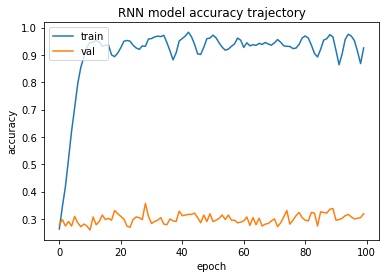

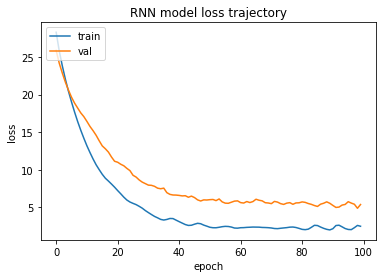

In [10]:
import matplotlib.pyplot as plt

# Plotting accuracy trajectory
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('RNN model accuracy trajectory')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Plotting loss trajectory
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('RNN model loss trajectory')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [13]:
print(x_test.shape)
print(test_target.shape)

(443, 22, 1000)
(443, 4)


In [14]:
score = model.evaluate(x_test, test_target, verbose=0)
print('Test accuracy of the basic RNN model:',score[1])

Test accuracy of the basic RNN model: 0.31151241064071655


In [8]:
train_scores = []
test_scores = []
time_period = 1000
for sub_idx in range(9):
    print("------------------------------------")
    print("Subject: %d" %(sub_idx))
    X_train_cur = x_train[:, :time_period, :]
    y_train_cur = train_target
    X_test_cur = x_test[:, :time_period, :]
    y_test_cur = test_target

    # single subject dataset
    X_train_cur = X_train_cur[np.where(person_train_valid == sub_idx)[0]]
    y_train_cur = y_train_cur[np.where(person_train_valid == sub_idx)[0]]
    X_test_cur = X_test_cur[np.where(person_test == sub_idx)[0]]
    y_test_cur = y_test_cur[np.where(person_test == sub_idx)[0]]


    history1 = model.fit(X_train_cur,y_train_cur,batch_size=38,epochs=38,shuffle=True,validation_data=(X_test_cur, y_test_cur))

    train_score = model.evaluate(X_train_cur, y_train_cur)
    test_score = model.evaluate(X_test_cur, y_test_cur)
    train_scores.append(train_score[1]*100)
    test_scores.append(test_score[1]*100)



------------------------------------
Subject: 0
Epoch 1/38
7/7 [==============================] - 5s 121ms/step - loss: 29.4393 - acc: 0.2827 - val_loss: 27.4300 - val_acc: 0.2800
Epoch 2/38
7/7 [==============================] - 0s 53ms/step - loss: 28.1037 - acc: 0.4177 - val_loss: 27.0760 - val_acc: 0.3200
Epoch 3/38
7/7 [==============================] - 0s 55ms/step - loss: 27.2856 - acc: 0.4557 - val_loss: 26.7005 - val_acc: 0.3600
Epoch 4/38
7/7 [==============================] - 0s 53ms/step - loss: 26.7410 - acc: 0.5148 - val_loss: 26.3361 - val_acc: 0.3800
Epoch 5/38
7/7 [==============================] - 0s 53ms/step - loss: 26.2692 - acc: 0.5654 - val_loss: 26.0129 - val_acc: 0.3200
Epoch 6/38
7/7 [==============================] - 0s 52ms/step - loss: 25.4014 - acc: 0.6709 - val_loss: 25.7168 - val_acc: 0.3200
Epoch 7/38
7/7 [==============================] - 0s 52ms/step - loss: 24.7446 - acc: 0.7511 - val_loss: 25.3422 - val_acc: 0.3200
Epoch 8/38
7/7 [==================

7/7 [==============================] - 0s 51ms/step - loss: 11.3864 - acc: 0.9915 - val_loss: 14.8551 - val_acc: 0.4600
Epoch 24/38
7/7 [==============================] - 0s 52ms/step - loss: 11.2140 - acc: 0.9873 - val_loss: 14.6747 - val_acc: 0.4600
Epoch 25/38
7/7 [==============================] - 0s 52ms/step - loss: 11.0515 - acc: 0.9873 - val_loss: 14.4995 - val_acc: 0.4600
Epoch 26/38
7/7 [==============================] - 0s 52ms/step - loss: 10.8534 - acc: 0.9958 - val_loss: 14.3215 - val_acc: 0.4600
Epoch 27/38
7/7 [==============================] - 0s 52ms/step - loss: 10.7222 - acc: 0.9873 - val_loss: 14.1936 - val_acc: 0.4600
Epoch 28/38
7/7 [==============================] - 0s 52ms/step - loss: 10.5248 - acc: 0.9915 - val_loss: 14.2618 - val_acc: 0.4600
Epoch 29/38
7/7 [==============================] - 0s 51ms/step - loss: 10.4008 - acc: 0.9831 - val_loss: 14.1096 - val_acc: 0.4600
Epoch 30/38
7/7 [==============================] - 0s 52ms/step - loss: 10.2485 - acc: 0

7/7 [==============================] - 0s 53ms/step - loss: 6.8914 - acc: 0.9274 - val_loss: 9.7963 - val_acc: 0.2400
Epoch 7/38
7/7 [==============================] - 0s 55ms/step - loss: 6.8247 - acc: 0.9274 - val_loss: 9.7800 - val_acc: 0.2600
Epoch 8/38
7/7 [==============================] - 0s 54ms/step - loss: 6.6792 - acc: 0.9872 - val_loss: 9.6821 - val_acc: 0.2800
Epoch 9/38
7/7 [==============================] - 0s 53ms/step - loss: 6.5899 - acc: 0.9829 - val_loss: 9.6114 - val_acc: 0.2800
Epoch 10/38
7/7 [==============================] - 0s 53ms/step - loss: 6.4870 - acc: 0.9915 - val_loss: 9.5929 - val_acc: 0.2800
Epoch 11/38
7/7 [==============================] - 0s 50ms/step - loss: 6.4004 - acc: 0.9786 - val_loss: 9.4688 - val_acc: 0.2800
Epoch 12/38
7/7 [==============================] - 0s 56ms/step - loss: 6.3437 - acc: 0.9829 - val_loss: 9.3352 - val_acc: 0.2800
Epoch 13/38
7/7 [==============================] - 0s 59ms/step - loss: 6.2994 - acc: 0.9786 - val_loss: 

7/7 [==============================] - 0s 52ms/step - loss: 3.3840 - acc: 1.0000 - val_loss: 6.4540 - val_acc: 0.3617
Epoch 30/38
7/7 [==============================] - 0s 52ms/step - loss: 3.3256 - acc: 1.0000 - val_loss: 6.4220 - val_acc: 0.3404
Epoch 31/38
7/7 [==============================] - 0s 54ms/step - loss: 3.2699 - acc: 1.0000 - val_loss: 6.3878 - val_acc: 0.3404
Epoch 32/38
7/7 [==============================] - 0s 52ms/step - loss: 3.2178 - acc: 1.0000 - val_loss: 6.3504 - val_acc: 0.3404
Epoch 33/38
7/7 [==============================] - 0s 51ms/step - loss: 3.1664 - acc: 1.0000 - val_loss: 6.2901 - val_acc: 0.3404
Epoch 34/38
7/7 [==============================] - 0s 52ms/step - loss: 3.1183 - acc: 1.0000 - val_loss: 6.2401 - val_acc: 0.3404
Epoch 35/38
7/7 [==============================] - 0s 52ms/step - loss: 3.0607 - acc: 1.0000 - val_loss: 6.1955 - val_acc: 0.3404
Epoch 36/38
7/7 [==============================] - 0s 55ms/step - loss: 3.0088 - acc: 1.0000 - val_los

7/7 [==============================] - 0s 52ms/step - loss: 2.4616 - acc: 1.0000 - val_loss: 5.2908 - val_acc: 0.2600
Epoch 14/38
7/7 [==============================] - 0s 54ms/step - loss: 2.4069 - acc: 1.0000 - val_loss: 5.2731 - val_acc: 0.2600
Epoch 15/38
7/7 [==============================] - 0s 52ms/step - loss: 2.3545 - acc: 1.0000 - val_loss: 5.2528 - val_acc: 0.2400
Epoch 16/38
7/7 [==============================] - 0s 52ms/step - loss: 2.3080 - acc: 1.0000 - val_loss: 5.2437 - val_acc: 0.2400
Epoch 17/38
7/7 [==============================] - 0s 52ms/step - loss: 2.2617 - acc: 1.0000 - val_loss: 5.2306 - val_acc: 0.2400
Epoch 18/38
7/7 [==============================] - 0s 53ms/step - loss: 2.2243 - acc: 0.9958 - val_loss: 5.2067 - val_acc: 0.2400
Epoch 19/38
7/7 [==============================] - 0s 52ms/step - loss: 2.1752 - acc: 0.9958 - val_loss: 5.1711 - val_acc: 0.2400
Epoch 20/38
7/7 [==============================] - 0s 51ms/step - loss: 2.1351 - acc: 1.0000 - val_los

7/7 [==============================] - 0s 55ms/step - loss: 2.6263 - acc: 0.9957 - val_loss: 4.9573 - val_acc: 0.4000
Epoch 37/38
7/7 [==============================] - 0s 54ms/step - loss: 2.5791 - acc: 0.9957 - val_loss: 4.9007 - val_acc: 0.4000
Epoch 38/38
2/2 [==============================] - 0s 13ms/step - loss: 4.9082 - acc: 0.3800
------------------------------------
Subject: 8
Epoch 1/38
7/7 [==============================] - 0s 54ms/step - loss: 5.9390 - acc: 0.2814 - val_loss: 4.7756 - val_acc: 0.3404
Epoch 2/38
7/7 [==============================] - 0s 52ms/step - loss: 3.4944 - acc: 0.6970 - val_loss: 4.5239 - val_acc: 0.3830
Epoch 3/38
7/7 [==============================] - 0s 51ms/step - loss: 3.4962 - acc: 0.8571 - val_loss: 4.6163 - val_acc: 0.4255
Epoch 4/38
7/7 [==============================] - 0s 53ms/step - loss: 3.4583 - acc: 0.9610 - val_loss: 4.7114 - val_acc: 0.4255
Epoch 5/38
7/7 [==============================] - 0s 52ms/step - loss: 3.4824 - acc: 0.9740 - v

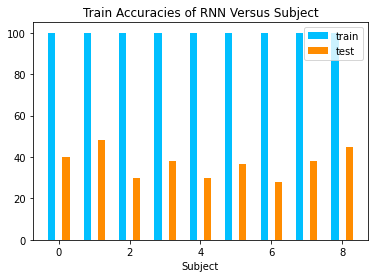

Train Accuracy:
[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]
Test Accuracy
[40.00000059604645, 47.999998927116394, 30.000001192092896, 37.99999952316284, 29.787233471870422, 36.73469424247742, 28.00000011920929, 37.99999952316284, 44.68085169792175]


In [12]:
import matplotlib.pyplot as plt

plt.figure()
x_aixs = np.arange(9)
plt.bar(x_aixs-0.2, train_scores, color = 'deepskyblue', label='train', width = 0.2)
plt.bar(x_aixs+0.2, test_scores, color = 'darkorange' ,label='test',width = 0.2)

plt.xlabel('Subject')
plt.legend()
plt.title("Train Accuracies of RNN Versus Subject")
plt.show()

print('Train Accuracy:')
print(train_scores)
print('Test Accuracy')
print(test_scores)
